<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [303]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [204]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
df = pd.read_csv(house_csv)

In [205]:
df.mean()

zip           95750.697462
beds              2.911675
baths             1.776650
sq__ft         1314.916751
price        234144.263959
latitude         38.607732
longitude      -121.355982
dtype: float64

In [206]:
print(stats.describe(df.select_dtypes(include="number")))
print(df.min())

DescribeResult(nobs=985, minmax=(array([ 9.56030000e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.55100000e+03,  3.82415140e+01, -1.21551704e+02]), array([ 9.58640000e+04,  8.00000000e+00,  5.00000000e+00,  5.82200000e+03,
        8.84790000e+05,  3.90208080e+01, -1.20597599e+02])), mean=array([ 9.57506975e+04,  2.91167513e+00,  1.77664975e+00,  1.31491675e+03,
        2.34144264e+05,  3.86077321e+01, -1.21355982e+02]), variance=array([7.25496326e+03, 1.71068672e+00, 8.01689984e-01, 7.27691304e+05,
       1.91451054e+10, 2.11507223e-02, 1.91207776e-02]), skewness=array([-0.39169025, -0.79356947, -0.23577176,  0.52597758,  1.08626462,
        0.07177557,  1.84785575]), kurtosis=array([-1.52711818,  0.6205296 ,  0.35357843,  1.2477645 ,  2.05448642,
       -0.40029302,  5.23798198]))
street                   1 KENNELFORD CIR
city                             ANTELOPE
zip                                 95603
state                                  CA
beds               

In [194]:
df = df[df != 0]

In [195]:
df = df[["price", "beds", "baths", "sq__ft"]]

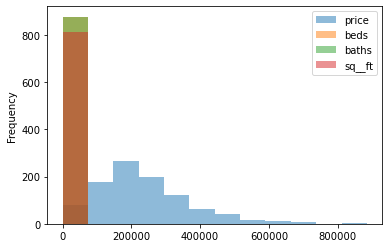

In [201]:
ax = df.plot.hist(bins=12, alpha=0.5)

In [198]:
#scale data as its not normalized
scaler = StandardScaler()
print(scaler.fit(df))
print(scaler.mean_)
#scaled_df = scaler.fit(df)
print(scaler.transform(df))
scaler.transform(df)

StandardScaler()
[2.34144264e+05 3.27023945e+00 1.99543900e+00 1.59114619e+03]
[[-1.26484345 -1.46987446 -1.4630568  -1.13823854]
 [-1.19983775 -0.31271117 -1.4630568  -0.63931931]
 [-1.19500752 -1.46987446 -1.4630568  -1.19853089]
 ...
 [ 0.00618773 -0.31271117  0.00670358 -0.56546118]
 [ 0.00836423  0.84445211  0.00670358  0.14146668]
 [ 0.01152413 -0.31271117  0.00670358 -0.34539408]]


array([[-1.26484345, -1.46987446, -1.4630568 , -1.13823854],
       [-1.19983775, -0.31271117, -1.4630568 , -0.63931931],
       [-1.19500752, -1.46987446, -1.4630568 , -1.19853089],
       ...,
       [ 0.00618773, -0.31271117,  0.00670358, -0.56546118],
       [ 0.00836423,  0.84445211,  0.00670358,  0.14146668],
       [ 0.01152413, -0.31271117,  0.00670358, -0.34539408]])

In [199]:
df.mean()

price     234144.263959
beds           3.270239
baths          1.995439
sq__ft      1591.146192
dtype: float64

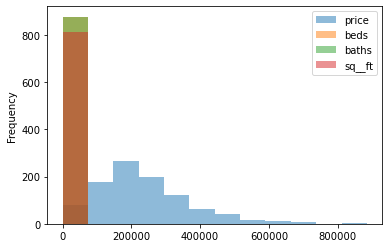

In [190]:
ax = df.plot.hist(bins=12, alpha=0.5)

In [189]:
df.corr(method='pearson')

,price,beds,baths,sq__ft
price,1.000000,0.450966,0.524377,0.693708
beds,0.450966,1.000000,0.659514,0.695710
baths,0.524377,0.659514,1.000000,0.724631
sq__ft,0.693708,0.695710,0.724631,1.000000


In [99]:
housing_df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 984
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   864 non-null    int64
 1   beds    864 non-null    int64
 2   baths   864 non-null    int64
 3   sq__ft  864 non-null    int64
dtypes: int64(4)
memory usage: 33.8 KB


In [180]:
#split the datasets since below has asked for predicted and actual
Y = df.price
X = housing_df_o[["beds"]]

In [155]:
housing_df_o[["sq__ft"]]

,sq__ft
0,836
1,1167
2,796
3,852
4,797
...,...
980,2280
981,1477
982,1216
983,1685


In [156]:
X

,beds
0,2
1,3
2,2
3,2
4,2
...,...
980,4
981,3
982,3
983,4


In [157]:
X.head(1)

,beds
0,2


# Split the Data

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [159]:
#data dimension
print("train shape: "+str(X_train.shape)+ str(Y_train.shape))
print("test shape: "+str(X_test.shape)+ str(Y_test.shape))

train shape: (691, 1)(691,)
test shape: (173, 1)(173,)


# Define Model

In [238]:
regr = linear_model.LinearRegression()

In [239]:
# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
housing_y_pred = regr.predict(X_test)

Coefficients: 
 [38074.34897026]
Mean squared error: 18781627461.54
Coefficient of determination: 0.09


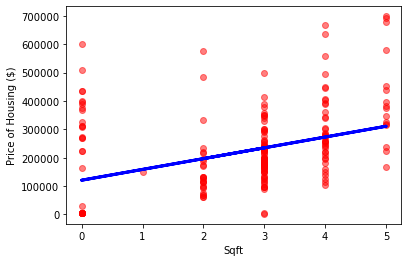

In [240]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, housing_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, housing_y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='red', alpha=0.5)
plt.plot(X_test, housing_y_pred, color='blue', linewidth=3)
plt.xlabel("Sqft")
plt.ylabel("Price of Housing ($)")

plt.xticks()
plt.yticks()

plt.show()

In [202]:
#will have to try again after removing outliers
z_scores = stats.zscore(df)
z_scores

array([[-1.26484345,         nan,         nan,         nan],
       [-1.19983775,         nan,         nan,         nan],
       [-1.19500752,         nan,         nan,         nan],
       ...,
       [ 0.00618773,         nan,         nan,         nan],
       [ 0.00836423,         nan,         nan,         nan],
       [ 0.01152413,         nan,         nan,         nan]])

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [73]:
# Put the target (housing value -- price) in another DataFrame
target = df[["price"]]

# ANSWER 

In this case the target variable is price, as we wish to gain a deeper understanding and predict price (Y), the response variable, from information the other independent features of the dataset

#### 2.2 List all possible variables which might be Predictor variable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
predictor_vars = df.select_dtypes(include='number')
print(predictor_vars)

       zip  beds  baths  sq__ft   price   latitude   longitude
0    95838     2      1     836   59222  38.631913 -121.434879
1    95823     3      1    1167   68212  38.478902 -121.431028
2    95815     2      1     796   68880  38.618305 -121.443839
3    95815     2      1     852   69307  38.616835 -121.439146
4    95824     2      1     797   81900  38.519470 -121.435768
..     ...   ...    ...     ...     ...        ...         ...
980  95829     4      3    2280  232425  38.457679 -121.359620
981  95823     3      2    1477  234000  38.499893 -121.458890
982  95610     3      2    1216  235000  38.708824 -121.256803
983  95758     4      2    1685  235301  38.417000 -121.397424
984  95762     3      2    1362  235738  38.655245 -121.075915

[985 rows x 7 columns]


In [9]:
predictors = df[["baths", "beds", "sq__ft"]]
X = predictors.sample(n=100, random_state=200)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 536 to 752
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   baths   100 non-null    int64
 1   beds    100 non-null    int64
 2   sq__ft  100 non-null    int64
dtypes: int64(3)
memory usage: 3.1 KB


# ANSWER
Unless we change the dtypes. all int/float features above are possible predictor variables that can determine a change in the response.

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

So the question here is. How do we perform feature selection?

We should explore different feature selection techniques to pick the best predictor(s)

In [11]:
df.corr(method='pearson')

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [12]:
df.corrwith(df["price"])

zip         -0.093353
beds         0.342024
baths        0.416208
sq__ft       0.333897
price        1.000000
latitude    -0.039573
longitude    0.284485
dtype: float64

In [13]:
df.baths.value_counts()

2    544
1    180
3    132
0    108
4     19
5      2
Name: baths, dtype: int64

# ANSWER
We can see that # of bathrooms ie bath feature column has the highest positive correlation with Price

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

# ANSWER
We can do a simple linear regression between using bath to predict price

 In a regression model, we are trying to minimize these errors by finding the “line of best fit” — the regression line from the errors would be minimal. We are trying to minimize the length of the black lines (or more accurately, the distance of the blue dots) from the red line — as close to zero as possible. It is related to (or equivalent to) minimizing the mean squared error (MSE) or the sum of squares of error (SSE), also called the “residual sum of squares.” (RSS) but this might be beyond the scope of this blog post :-)

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

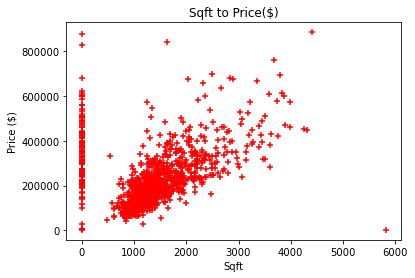

In [21]:
plt.scatter(df.sq__ft, df.price, color='red', marker='+')
plt.xlabel('Sqft')
plt.ylabel("Price ($)")
plt.title("Sqft to Price($)")
_= plt.show()

Text(0.5, 1.0, 'Bath, Bed, Sqft to Predict Price')

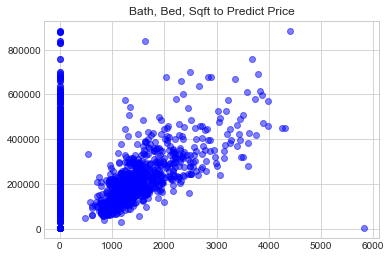

In [36]:
#first visualize the relationship
plt.style.use('seaborn-whitegrid')
plt.plot(X, y, 'o', color='blue', alpha=0.5);
plt.title("Bath, Bed, Sqft to Predict Price")

In [77]:
data = df

In [ ]:

# Set the features  
df = df[["sq__ft"]]

# Set the target
target = df[["price"]]

In [84]:
target
df

,sq__ft
0,836
1,1167
2,796
3,852
4,797
...,...
980,2280
981,1477
982,1216
983,1685


In [85]:
# ANSWER

X = df
y = target

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.664
Model:                            OLS   Adj. R-squared (uncentered):              0.664
Method:                 Least Squares   F-statistic:                              1944.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                   3.07e-235
Time:                        14:32:21   Log-Likelihood:                         -13186.
No. Observations:                 985   AIC:                                  2.637e+04
Df Residuals:                     984   BIC:                                  2.638e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft       141.3912      3.207     44.092      0.000     135.098     147.684
==============================================================================
Omnibus:                      361.822   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1539.871
Skew:                           1.693   Prob(JB):                         0.00
Kurtosis:                       8.104   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     123.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           4.43e-27
Time:                        14:35:21   Log-Likelihood:                -12999.
No. Observations:                 985   AIC:                         2.600e+04
Df Residuals:                     983   BIC:                         2.601e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.629e+05   7642.244     21.320      0.000    1.48e+05    1.78e+05
sq__ft        54.1586      4.877     11.106      0.000      44.589      63.728
==============================================================================
Omnibus:                      289.159   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.022
Skew:                           1.493   Prob(JB):                    4.23e-175
Kurtosis:                       6.263   Cond. No.                     2.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

In [208]:
X = df[["sq__ft", "baths", "beds"]]
y = df["price"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              1006.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                   7.17e-299
Time:                        16:18:51   Log-Likelihood:                         -13032.
No. Observations:                 985   AIC:                                  2.607e+04
Df Residuals:                     982   BIC:                                  2.608e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft        18.5092      7.105      2.605      0.009       4.567      32.451
baths         7.1e+04   9057.043      7.839      0.000    5.32e+04    8.88e+04
beds        2.175e+04   5825.524      3.734      0.000    1.03e+04    3.32e+04
==============================================================================
Omnibus:                      288.781   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              791.972
Skew:                           1.498   Prob(JB):                    1.06e-172
Kurtosis:                       6.213   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
X = df.select_dtypes(include="number")
y = target["price"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [250]:
predictions = lm.predict(X)
print(predictions[:2])

[196668.13226573 234742.48123599]


In [99]:
#coef is
lm.score(X,y)

1.0

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [214]:
df_nums = df.select_dtypes(include="number")

In [215]:
df_nums.head(1)

,zip,beds,baths,sq__ft,price,latitude,longitude
0,95838,2,1,836,59222,38.631913,-121.434879


In [254]:
# ANSWER
X = df_nums[['beds']]
y = df.price
print(X.shape)
print(y.shape)

(985, 1)
(985,)


In [255]:
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions_for_beta = lm.predict(X)

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [290]:
# ANSWER
df['beds'].mean
# Calculate the mean of X and y
xmean = df['beds'].mean()
ymean = df['price'].mean()

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['beds'] - xmean) * (df['price'] - ymean)
df['xvar'] = (df['beds'] - xmean)**2

# Calculate beta1 and beta0(alpha)
beta1 = df['xycov'].sum() / df['xvar'].sum()
print(f'beta1 = {beta}')

beta1 = 36182.6439689373


In [280]:
# crosscheck answer here
regr.coef_

array([36182.64396894])

##### 2.7.B Calculate beta_0

In [289]:
beta0 = ymean - (beta * xmean)
print(f'beta0 = {alpha}')

beta0 = 128792.15948942926


In [279]:
#crosscheck answer here
regr.intercept_

128792.15948942925

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [298]:
# ANSWER
yhat=(beta1 * X) + beta0
yhat

#header seems wrong

,beds
0,201157.447427
1,237340.091396
2,201157.447427
3,201157.447427
4,201157.447427
...,...
980,273522.735365
981,237340.091396
982,237340.091396
983,273522.735365


In [299]:
#crosscheck answer
yhat=(regr.coef_ * X ) + regr.intercept_
yhat

,beds
0,201157.447427
1,237340.091396
2,201157.447427
3,201157.447427
4,201157.447427
...,...
980,273522.735365
981,237340.091396
982,237340.091396
983,273522.735365


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [244]:
# ANSWER
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
residual = (Y_test - prediction)

In [245]:
residual

613   -119668.132266
451    -74891.179177
731      6228.518764
436    -51816.830206
275     59250.518764
           ...      
292    137331.867734
209    -66742.481236
506    111003.518764
49     -66742.481236
717    -12742.481236
Name: price, Length: 197, dtype: float64

https://stackoverflow.com/questions/55095437/in-python-sklearn-regression-is-there-a-command-to-return-residuals-for-all-rec

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [ ]:
# ANSWER: Polynomial Regression
res = Y-Y
#SSreg = 
Rsquared = 1-(SSRes/SST)

In [ ]:
polyfit(X,Y,yhat)

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



